In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
from sklearn.utils import resample
import seaborn as sns

from bootstrapped import bootstrap as bs
from bootstrapped import stats_functions as bs_st
from scipy.stats import ttest_ind

### Исходные данные по ARPU

In [2]:
# ARPU за январь 2022
my_sd = pd.read_csv('sd_my_1.csv') 

In [3]:
my_sd.iloc[:,0]

0        14880.0
1         8240.0
2         4920.0
3        49920.0
4         8240.0
          ...   
1457    113920.0
1458      8240.0
1459      7920.0
1460      4920.0
1461      7540.0
Name: 63360.0, Length: 1462, dtype: float64

In [4]:
# стандартное отклонение исходной выборки
data=pd.Series(my_sd.iloc[:,0])
data.std()

10766.653971623195

### Сократим дисперсию с применением bootstrap

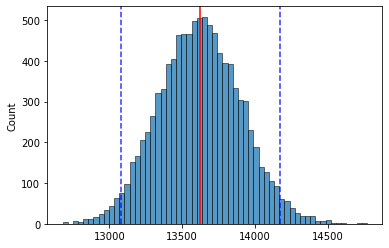

In [5]:
# среднее арифметческое по выборке
sample_1 = data
sample_1_mean=sample_1.mean()

r1 = []
for i in range(0, 10000):
    resample_1 = resample(sample_1, replace=True)
    resample_1_mean=resample_1.mean()
    r1.append(resample_1_mean)
    
r1 = np.array(r1)

sns.histplot(r1)
plt.axvline(r1.mean(), color='red')
plt.axvline(np.percentile(r1, 2.5), color='blue', alpha=.8, linestyle='--')
plt.axvline(np.percentile(r1, 97.5), color='blue', alpha=.8, linestyle='--')

In [6]:
print("Среднее по исходной выборке ARPU = ",data.mean())

Среднее по исходной выборке ARPU =  13624.387010943909


In [7]:
print("Среднее после применения bootstrap = ",r1.mean())

Среднее после применения bootstrap =  13620.032260272914


In [8]:
print("Стандартное отклонение по исходной выборке ARPU = ",data.std())

Стандартное отклонение по исходной выборке ARPU =  10766.653971623195


In [9]:
print("Стандартное отклонение после применения bootstrap = ",r1.std())

Стандартное отклонение после применения bootstrap =  280.7188943392315


### Сократим дисперсию с применением библиотечного bootstrap

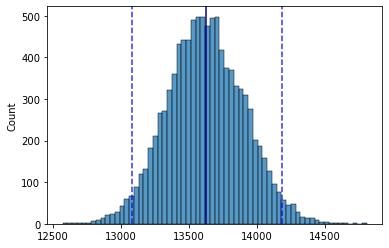

In [10]:
# воспользуемся кодом из статьи https://habr.com/ru/company/yandex/blog/476826/ 
# через библиотечный бутстрэп

# переводим в одномерный массив
sample_1 = data.values

bs_1 = bs.bootstrap(sample_1, stat_func=bs_st.mean, 
             num_iterations=10000, iteration_batch_size=300, 
             return_distribution=True)

sns.histplot(bs_1)
plt.axvline(bs_1.mean(), color='darkblue', label='Original')
plt.axvline(np.percentile(bs_1, 2.5), color='blue', alpha=.8, linestyle='--')
plt.axvline(np.percentile(bs_1, 97.5), color='blue', alpha=.8, linestyle='--')

In [11]:
print("Среднее по исходной выборке ARPU = ",data.mean())

Среднее по исходной выборке ARPU =  13624.387010943909


In [12]:
print("Среднее после применения bootstrap = ",r1.mean())

Среднее после применения bootstrap =  13620.032260272914


In [13]:
print("Стандартное отклонение по исходной выборке ARPU = ",data.std())

Стандартное отклонение по исходной выборке ARPU =  10766.653971623195


In [14]:
print("Стандартное отклонение после применения bootstrap = ",r1.std())

Стандартное отклонение после применения bootstrap =  280.7188943392315
